# Handwritten Digits Classification

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Get Data

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## EDA

In [11]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

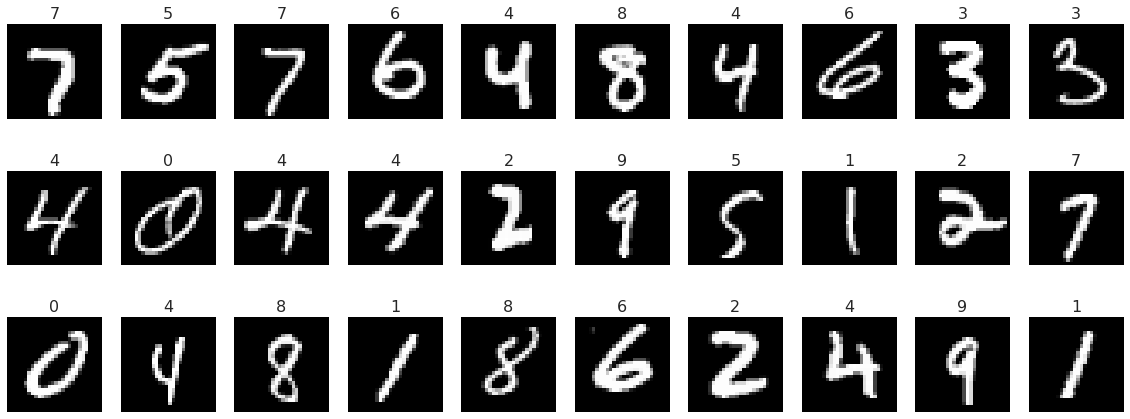

In [12]:
n_samples = 30
images, labels = get_samples(n_samples, X_train, y_train)
# images, labels = get_digit(4, n_samples)
plot_images(images, labels)

**Plot the barplot of number of images of each class (0 to 9)**

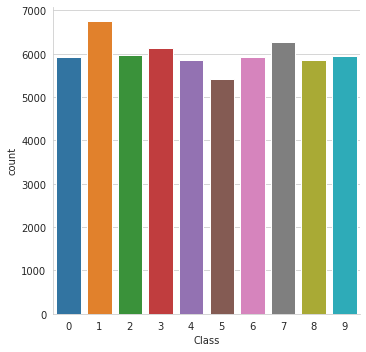

In [13]:
# Your code here
dat = pd.DataFrame(data=y_train, columns=['Class'])
sns.catplot(data = dat, x='Class', kind='count')

plt.show()

**Print out the range of pixel values (min, max)**

In [14]:
# Your code here
print(np.amin(X_train))
print(np.amax(X_train))

0
255


## Transform data for training

**Get the first `n_samples` images randomly from training set and test set. Then reshape them into long vectors**

In [15]:
n_samples = 1000
# Fill the blanks
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_train_flat = np.reshape(X_train_flat, (len(X_train_flat),-1))
y_train_flat = np.reshape(y_train_flat, (len(y_train_flat),-1))

X_test_flat, y_test_flat = get_samples(200, X_test, y_test)
X_test_flat = np.reshape(X_test_flat, (len(X_test_flat),-1))
y_test_flat = np.reshape(y_test_flat, (len(y_test_flat),-1))

# Normalization
X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255

In [16]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (1000, 784)
Test data (200, 784)


## Train models

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Train a SVM model**: Set up the training process and train with the small samples of data first before you take the full training dataset to train.

In [18]:
# Your code here

svm = SVC()

## Evaluation

**Get the predictions on test data**

In [23]:
# Your code here
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score

svm.fit(X_train_flat, y_train_flat)
prediction = svm.predict(X_test_flat)

**Plot the confusion matrix in form of a heatmap**

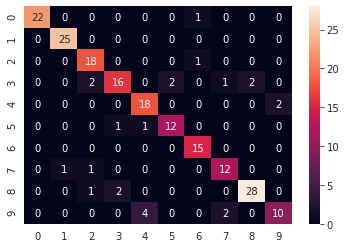

In [28]:
# Your code here
import pandas as pd

cm = confusion_matrix(y_test_flat, prediction)

sns.heatmap(cm, annot = True)

In [29]:
print(accuracy_score(y_test_flat, prediction))

0.88


**Plot the samples that the model predicts incorrectly**

In [21]:
# Your code here


## Save model

In [22]:
import pickle

pickle.dump(clf, open('svm_mnist.pkl', 'wb'))

NameError: ignored

**Re-load model for testing**

In [ ]:
# Your code here


## BONUS: Embedding the model into a web application

### Project structure

* Clone the files of the repository

```bash
git clone https://github.com/dhminh1024/flask_doc.git
```

* Change directory

```bash
cd flask_doc
```

* Create the following folders and files

|-app/
    |-templates/
        |-base.html
    |-static/
        |-js/
            |-index.js
        |-css/
            |-style.css
        |-images/
    |-blueprints/
        |-__ init__.py
    |-middlewares/
    |-models/
    |-main.py

```bash
mkdir app app/templates app/static app/static/js app/static/css app/static/images app/blueprints app/middlewares app/models
touch app/main.py app/templates/base.html app/static/js/index.js app/static/css/style.css
touch app/blueprints/__init__.py
```

* Add jquery (optional)

```bash
mv ./jquery-3.4.1.min.js app/static/js/
```

* Add Canvas (optional)

```bash
mv ./index.js app/static/js/index.js
```

* Add Coderschool logo (optional)

```bash
mv ./images/coderschool-logo.png app/static/images/
rm -r images
```

* Add this code in **app/main.py**

```python
from flask import Flask, render_template
from blueprints import *

app = Flask(__name__)
app.register_blueprint(home)

if __name__ == '__main__':
  app.run(host='127.0.0.1', port=5000, debug=True)
```
> *Hints: most of this code can be automaticaly generated with a VSCode Extension called flask-snippets by only writting "fapp"*
> ![](https://i.imgur.com/npmdsha.png=500x)

### Generating a new blueprint of our Flask app

> A blueprint is a template for generating a "section" of our Flask app

* In **flask_doc** directory, run this code in the **Terminal**

```bash
export NEW_BLUEPRINT=home
mkdir app/blueprints/$NEW_BLUEPRINT
touch app/blueprints/$NEW_BLUEPRINT/__init__.py app/blueprints/$NEW_BLUEPRINT/blueprint.py
echo "from .$NEW_BLUEPRINT import $NEW_BLUEPRINT" >> app/blueprints/__init__.py
echo "from .blueprint import $NEW_BLUEPRINT" > app/blueprints/$NEW_BLUEPRINT/__init__.py
printf \
"from flask import Blueprint, render_template, request\n\
\n\
$NEW_BLUEPRINT = Blueprint('$NEW_BLUEPRINT', __name__)\
\n\
@$NEW_BLUEPRINT.route('/home')\n\
def route_name():\n\
    return render_template('$NEW_BLUEPRINT.html') \n\
" > app/blueprints/$NEW_BLUEPRINT/blueprint.py
cp ./sample_page.html app/templates/$NEW_BLUEPRINT.html
```
> Hints: change 'home' to make a new blueprint (line 1 & 14)

### HTML Template

* Add this code in **app/templates/base.html**

```HTML
<!doctype html>
<html lang="en">
  <head>
    <title>Title</title>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    <!-- CSS -->
    <link href="static/css/style.css" rel="stylesheet">
</head>
  <body class="text-center">
    {% block content%} {% endblock %} 
    
    <script src="static/js/jquery-3.4.1.min.js"></script>
    <script src="static/js/index.js"></script>
    <!-- AJAX optional -->
    <script type="text/javascript">
        $("#myButton").click(function(){
            $('#result').text('  Predicting...');
            var $SCRIPT_ROOT = {{request.script_root|tojson|safe}};
            var canvasObj = document.getElementById("canvas");
            var img = canvasObj.toDataURL('image/jpeg');
            $.ajax({
                type: "POST",
                url: $SCRIPT_ROOT + "/upload/",
                data: img,
                success: function(data){
                    $('#result').text('Predictions ' + data);
                }
            });
        });
    </script>
  </body>
</html>
```

> *Hints: most of this code can be automaticaly generated with VSCode Extensions called Bootstrap 4, Font awesome 4, Font Awesome 5 Free & Pro snippets by only writting "b4-$"*

### Run the app

* Change directory

```bash
cd app
```

* Run the app

```bash
python main.py
```

Congratulation, you have just created your Flask app. Here is the link of your Flask app: http://127.0.0.1:5000/home

### Html for MNIST example

* Replace the code of **app/templates/home.html** by this code 

```HTML
{% extends "base.html" %} {% block content %}
<div style="margin-top:50px">
  <img class="mb-4" src="static/images/coderschool-logo.png" alt="" />
  <h1 class="h3 mb-3 font-weight-normal">Please draw a number</h1>

  <canvas id="canvas" width="400" height="400"></canvas>

  <h1 class="h3 mb-3 font-weight-normal" id="result">Predictions:</h1>

  <button id="myButton" class="btn  btn-primary " type="submit">
    Predict
  </button>
  <button id="clearButton" class="btn btn-success" type="submit">
    Clear
  </button>

  <p class="mt-5 mb-3 text-muted">&copy; CoderSchool</p>
</div>
{% endblock %}

```

### Python for MNIST example

* In **flask_doc** directory, run this code to generate the blueprint related to upload

```bash
export NEW_BLUEPRINT=upload_api
mkdir app/blueprints/$NEW_BLUEPRINT
touch app/blueprints/$NEW_BLUEPRINT/__init__.py app/blueprints/$NEW_BLUEPRINT/blueprint.py
echo "from .$NEW_BLUEPRINT import $NEW_BLUEPRINT" >> app/blueprints/__init__.py
echo "from .blueprint import $NEW_BLUEPRINT" > app/blueprints/$NEW_BLUEPRINT/__init__.py
printf \
"from flask import Blueprint, render_template, request\n\
\n\
$NEW_BLUEPRINT = Blueprint('$NEW_BLUEPRINT', __name__)\
\n\
@$NEW_BLUEPRINT.route('/upload_api')\n\
def route_name():\n\
    return render_template('$NEW_BLUEPRINT.html') \n\
" > app/blueprints/$NEW_BLUEPRINT/blueprint.py
cp ./sample_page.html app/templates/$NEW_BLUEPRINT.html
```


* Replace the code of **app/blueprints/upload_api/blueprint.py** by this code

```python
from flask import Blueprint, render_template, request
import re
import base64
import numpy as np

def parse_image(imgData):
    img_str = re.search(b"base64,(.*)", imgData).group(1)
    img_decode = base64.decodebytes(img_str)
    with open('output.png', "wb") as f:
        f.write(img_decode)
    return img_decode

# Load your model here
model = None

upload_api = Blueprint('upload_api', __name__)


@upload_api.route('/upload/', methods=['POST'])
def upload():
    image = parse_image(request.get_data())
    # Your prediction here
    prediction = 0
    return str(prediction)

```

* Register the upload API in **app/main.py**:

```python
from flask import Flask, render_template
from blueprints import *

app = Flask(__name__)
app.register_blueprint(home)
app.register_blueprint(upload_api)

if __name__ == '__main__':
    app.run(host='127.0.0.1', port=5000, debug=True)
```